In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_stock = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
df_stock


,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
...,...,...,...
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981


In [4]:
X = df_stock.iloc[:,:-1].values
y = df_stock.iloc[:,-1].values

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape


(1000,)

In [7]:
X_train = X
y_train = y

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=6)

In [50]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(fit_intercept=True)
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred = regression.predict(X_test)

Text(0.5, 1.0, 'Linear model predictions')

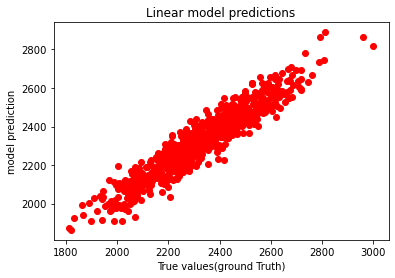

In [52]:
plt.scatter(y_test, y_pred, color='r')
plt.xlabel('True values(ground Truth)')
plt.ylabel('model prediction')
plt.title('Linear model predictions')


# 3dをおこなっていきます。

In [53]:
k = X_test.shape
n = len(X_test)

In [54]:
k[0]

700

In [55]:
k[1]

2

In [56]:
k

(700, 2)

In [57]:
k = X_test.shape[1]
n = len(X_test)


In [58]:
n

700

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


In [60]:
print('RMSE =',RMSE, '\nMSE =', MSE,'\nMAE', MAE, '\nr2', r2)

RMSE = 62.133 
MSE = 3860.450203074592 
MAE 50.030206519304954 
r2 0.8971714388069837


In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
RMSE = float(format(mean_squared_error(y_test, y_pred)))
RME = mean_squared_error(y_test, y_pred)
RAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_pred)/y_test))*100

In [62]:
print('RMSE=',RMSE, '\nRME=', RME, '\nRAE=',RAE, '\nr2=', r2, '\nadj_r2',adj_r2,'\nMAPE',MAPE)

RMSE= 3860.450203074592 
RME= 3860.450203074592 
RAE= 50.030206519304954 
r2= 0.8971714388069837 
adj_r2 0.8968763783731444 
MAPE 2.1665262416575963


In [63]:
from mpl_toolkits.mplot3d import Axes3D


In [70]:
x_surf,y_surf = np.meshgrid(np.linspace(df_stock['Interest Rates'].min(),  df_stock['Interest Rates'].max(),100),np.linspace(  df_stock['Employment'].min(),df_stock['Employment'].max(),100) ) 

In [97]:
x_surf.shape

(100, 100)

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [73]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

In [74]:
onlyX.shape

(10000, 2)

In [75]:
fittedY = regression.predict(onlyX)

In [76]:
fittedY.shape

(10000,)

In [77]:
fittedY = fittedY.reshape(x_surf.shape)

In [78]:
fittedY.shape

(100, 100)

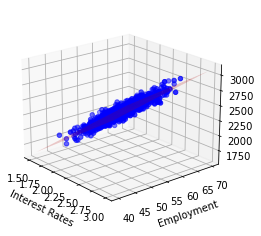

In [119]:
fig = plt.figure()
axes = fig.add_subplot(111,projection='3d')

axes.scatter(df_stock['Interest Rates'], df_stock['Employment'], df_stock['S&P 500 Price'], color='b', marker='o')
axes.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.2)
axes.set_xlabel('Interest Rates')
axes.set_ylabel('Employment')
axes.view_init(20,320)
plt.show()

In [95]:
onlyX


,Interest Rates,Employment
0,1.500000,40.0
1,1.515152,40.0
2,1.530303,40.0
3,1.545455,40.0
4,1.560606,40.0
...,...,...
9995,2.939394,70.0
9996,2.954545,70.0
9997,2.969697,70.0
9998,2.984848,70.0


In [96]:
X


array([[ 1.94385927, 55.41357113],
       [ 2.25822894, 59.54630512],
       [ 2.21586278, 57.41468676],
       ...,
       [ 2.00964367, 57.00435706],
       [ 2.20165596, 62.44779038],
       [ 2.18063797, 46.29703432]])

ValueError: could not convert string to float: 'Interest Rates'

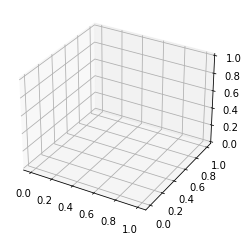

In [106]:
fig  = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot('Interest Rates','Employment','S&P 500 Price' ,data=df_stock)
axes.scatter(x_surf, y_surf, fittedY,color='b',marker='o')